# 导致心脏病数据科学项目


# 介绍
心脏病是男女死亡的主要原因。在美国，每年有61万人死于心脏病，占所有死亡人数的四分之一。冠心病是最常见的一种心脏病，它会导致流向心脏的血液减少，每年夺去37万人的生命。一些生理因素导致心脏病，如高胆固醇和高血压(CDC, 2015)。
该数据集包含关于患者和各种变量的信息，以及指定患者是否有超过50%的导致心脏闭塞的动脉的目标变量。50%的阈值是明显狭窄的指示，是心脏病学家和其他内科医生进一步诊断的标志,
数据集中的不同变量，并回答以下问题:
有多少个体变量与直径变窄相关?(相关结果以蓝色显示)
男性和女性之间的变量是什么?(相关结果以黄色标示)
此外，分析将呈现和比较使用决策树预测患者是否有50%的>狭窄。

In [1]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from IPython.display import Image  
from sklearn.tree import export_graphviz
%matplotlib inline
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# pip install graphviz
from graphviz import Source

In [3]:
heart = pd.read_csv("./heart.csv")
print(heart.shape)
heart.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

这个数据集中有14列，它们的定义如下:
'age':年龄,
'sex':人的性别(1 =男性，0 =女性),
'cp':胸痛(值1:典型心绞痛，值2:非典型心绞痛，值3:非心绞痛，值4:无症状) 
'trestbps':患者入院时的静息血压(mm Hg),
'chol':人的胆固醇含量以毫克/分升为单位,
'fbs':空腹血糖(> 120 mg/dl, 1 =真;0 = false),
'restecg':静息心电图测量(0 =正常，1 = ST-T波异常，2 =根据Estes标准显示可能或明确的左室肥厚),
'thalach':人的最大心率,
'exang':运动诱发心绞痛(1 =有;0 = no),
'oldpeak':运动相对于休息引起的ST抑制(“ST”与心电图上的位置有关),
'slope':峰值运动ST段的坡度(值1:下降，值2:平缓，值3:上升), 
'ca':主要船舶数量(0-3艘), 
'thal':一种叫做地中海贫血的血液疾病(1 =固定缺陷，2 =正常，3 =反向缺陷), 
'target':血管造影疾病状态(0 = >50%直径变窄，1 = <50%直径变窄),
  

In [6]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# 查看有无空值
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

没有空值

注意:sex、cp、fbs、restecg、exang、slope、ca、thal和target是分类的类型。

In [9]:
# 查看重复行
dup_count = heart.duplicated()
dup_count
heart[dup_count]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [10]:
dup = heart.loc[heart['age'] == 38]
dup

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


163和164是重复行，由于相邻可能是录入重复  删除重复行

In [11]:

heart = heart.drop_duplicates()
heart.shape

(302, 14)

查看分类属性中有没有不属于分类属性中的值

In [15]:
heart["sex"].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [17]:
ls = ['sex', 'cp',  'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']
for i in ls:
    print(heart[i].value_counts())
    print("=====================")

1    206
0     96
Name: sex, dtype: int64
0    143
2     86
1     50
3     23
Name: cp, dtype: int64
0    257
1     45
Name: fbs, dtype: int64
1    151
0    147
2      4
Name: restecg, dtype: int64
0    203
1     99
Name: exang, dtype: int64
2    141
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64
2    165
3    117
1     18
0      2
Name: thal, dtype: int64
1    164
0    138
Name: target, dtype: int64


In [ ]:
分析在ca 和 thal 中都多了一项

In [19]:
heart["ca"].value_counts()

0    175
1     65
2     38
3     20
4      4
Name: ca, dtype: int64

In [22]:
heart[heart["ca"]==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [23]:
heart["thal"].value_counts()

2    165
3    117
1     18
0      2
Name: thal, dtype: int64

In [24]:
heart[heart["thal"]==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


删除上面的几行异常数据

In [25]:
heart = heart.drop(list(heart[heart['ca'] == 4].index))
heart = heart.drop(list(heart[heart['thal'] == 0].index))
heart.shape

(296, 14)

查看年龄和性别的分布

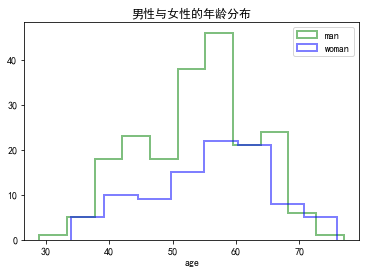

In [28]:
man_age_dist = heart.loc[heart['sex'] == 1]['age']  #男性的年龄分布
woman_age_dist = heart.loc[heart['sex'] == 0]['age']  #女#性的年龄分布
sns.distplot(man_age_dist, kde = False, label = 'man',
             hist_kws={"histtype": "step", "linewidth": 2, "alpha": 0.5, "color": "g"})
sns.distplot(woman_age_dist, kde = False, label = 'woman',
             hist_kws={"histtype": "step", "linewidth": 2, "alpha": 0.5, "color": "b"})
plt.legend()
plt.title('男性与女性的年龄分布')
plt.show()

从上面的数据集中可以得出男性比女性多得多。大部分女性年龄在50 - 65岁之间

In [29]:
heart_corr = heart.corr()
heart_corr.style.background_gradient(cmap = plt.get_cmap('bwr'))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1,-0.0898197,-0.0614045,0.288701,0.20092,0.133022,-0.112365,-0.395989,0.0980509,0.199373,-0.161758,0.364229,0.0633733,-0.225453
sex,-0.0898197,1,-0.0480234,-0.0595201,-0.193749,0.0369805,-0.072303,-0.0582935,0.140791,0.102641,-0.0287189,0.088788,0.212017,-0.285322
cp,-0.0614045,-0.0480234,1,0.0446101,-0.0679264,0.118337,0.0391061,0.296621,-0.383902,-0.142159,0.104675,-0.226203,-0.16266,0.423425
trestbps,0.288701,-0.0595201,0.0446101,1,0.126705,0.183658,-0.117539,-0.051817,0.0705015,0.196793,-0.126742,0.102042,0.0637733,-0.148922
chol,0.20092,-0.193749,-0.0679264,0.126705,1,0.0142859,-0.142039,-0.00194709,0.0621323,0.0421441,0.00557175,0.119006,0.0824963,-0.0765405
fbs,0.133022,0.0369805,0.118337,0.183658,0.0142859,1,-0.0823613,-0.00715546,-0.00186319,0.00706214,-0.0465499,0.151259,-0.0178914,-0.0046796
restecg,-0.112365,-0.072303,0.0391061,-0.117539,-0.142039,-0.0823613,1,0.0300006,-0.065623,-0.0555277,0.0909151,-0.111317,-0.00872349,0.131716
thalach,-0.395989,-0.0582935,0.296621,-0.051817,-0.00194709,-0.00715546,0.0300006,1,-0.383671,-0.346742,0.388453,-0.267861,-0.111961,0.426655
exang,0.0980509,0.140791,-0.383902,0.0705015,0.0621323,-0.00186319,-0.065623,-0.383671,1,0.287812,-0.248879,0.146783,0.224178,-0.425085
oldpeak,0.199373,0.102641,-0.142159,0.196793,0.0421441,0.00706214,-0.0555277,-0.346742,0.287812,1,-0.577779,0.292905,0.211675,-0.428804


In [ ]:
g = sns.FacetGrid(heart, col = 'restecg', row = 'target', hue = 'sex', legend_out = True, height = 3)
g.map(sns.kdeplot, 'age', shade = True).add_legend()

plt.show()

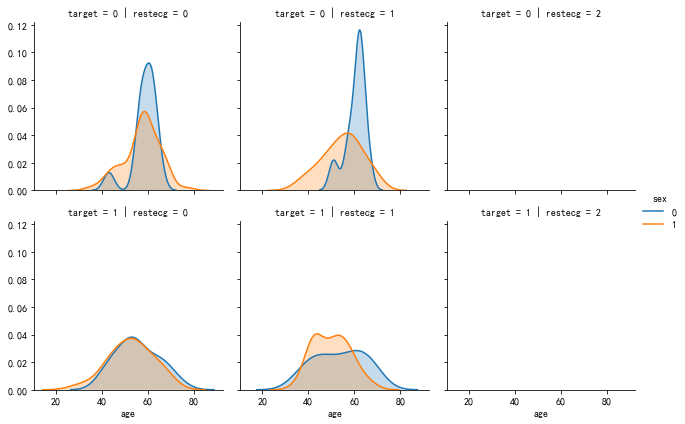

In [30]:
g = sns.FacetGrid(heart, col = 'restecg', row = 'target', hue = 'sex', legend_out = True, height = 3)
g.map(sns.kdeplot, 'age', shade = True).add_legend()

plt.show()

In [ ]:
结果显示，大多数>50%瘦患者在休息时ST-T波异常。检查运动后患者ST值的变化

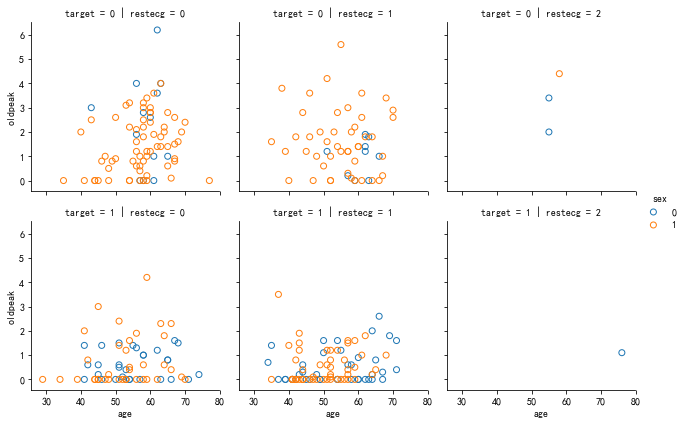

In [31]:
g4 = sns.FacetGrid(heart, col = 'restecg', row = 'target', hue = 'sex', legend_out = True, height = 3)
g4.map(plt.scatter, 'age', 'oldpeak', facecolors = 'none').add_legend()
plt.show()

<50%瘦的个体ST值在0附近的比例更大。相反，那些>50%瘦的患者ST值较低

ST压低代表心室去极化，它位于QRS波复合体和T波之间(Kashou等)。该区域预计是平坦的，
>1mm的低气压水平被认为是异常的(Hill和Thomas)。
ST期升高或降低均可提示异常。
ST期的降低可能提示低钾血症或心肌缺血(Kashou等)。

# 性别 sex和胸痛cp类型之间的关系

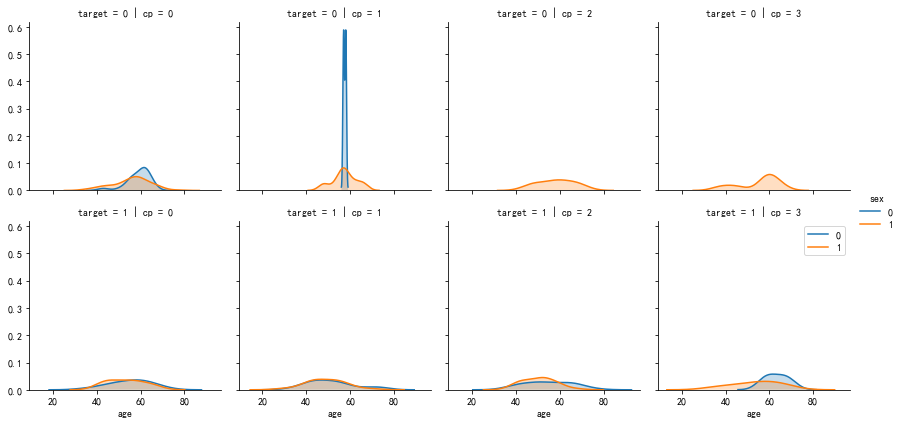

In [32]:
g = sns.FacetGrid(heart, col = 'cp', row = 'target', hue = 'sex', legend_out = True, height = 3)
g.map(sns.kdeplot, 'age', shade = True).add_legend()
plt.legend()
plt.show()

年龄在55-60岁之间的女性中，胸痛1(典型心绞痛)和明显的心脏疾病(>50%狭窄)的比例要高得多。有趣的是，有胸痛2和3的女性没有明显的心脏问题。记住胸痛的类型有:1:典型心绞痛，2:非典型心绞痛，3:非心绞痛，4:无症状。
根据Hermann等人的研究，典型的心绞痛是“(1)胸骨后胸痛或不适，(2)由劳累或情绪压力引起，(3)由休息或硝酸甘油(或两者兼有)缓解”。(赫尔曼等)。非典型性心绞痛是符合2 / 3的标准。无症状性胸痛是指胸痛既没有引起也没有表现出症状。据我所知，这可能是由于心脏附近的其他器官出了问题。肺部疾病。

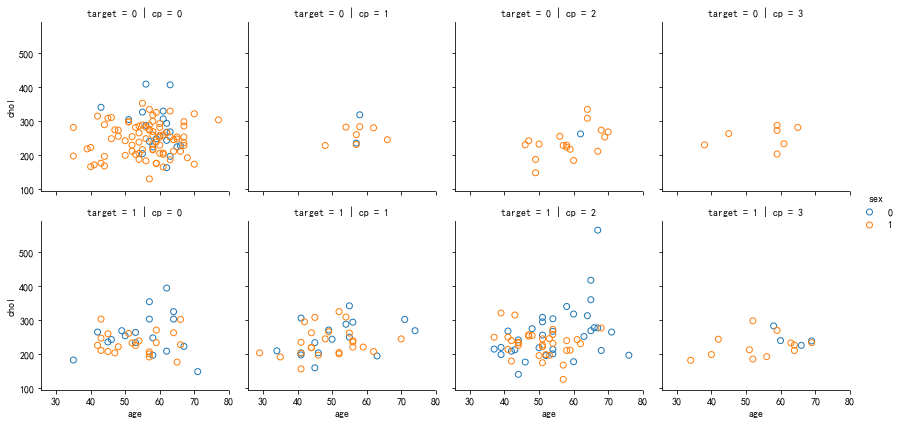

In [33]:
g2 = sns.FacetGrid(heart, col = 'cp', row = 'target', hue = 'sex', legend_out = True, height = 3)
g2.map(plt.scatter, 'age', 'chol', facecolors = 'none').add_legend()

plt.show()

更深入的研究显示，只有2名女性患有1型胸痛，且有明显的心脏问题。这就解释了在前一个图中，女性的target = 0 | cp = 1的巨大峰值。还要注意的是，一名女性有2型胸痛和明显的心脏问题。值得注意的是，虽然男性的血脑屏障缩小50%的可能性更大，但这可能是由于女性的样本量有限。

由于女性的样本量有限，很难得出男性和女性胸痛差异的结论，>缩小50%。然而，对于那些胸痛小于50%的患者，男性和女性胸痛似乎没有区别。

从理论上讲，有心脏病的人应该有更高的胆固醇水平。从上面的情节中很难看出是不是这样。我们用箱线图来代替。我们可以使用groupby dataframe将数据分成两个组(target = 0和target = 1)

In [34]:
heart_man = heart[heart['sex'] == 1].groupby('target')[['trestbps', 'chol', 'thalach', 'oldpeak']]
heart_woman = heart[heart['sex'] == 0].groupby('target')[['trestbps', 'chol', 'thalach', 'oldpeak']]

In [35]:
heart_man.agg([np.mean, np.max, np.min])

trestbps                  chol               thalach            \
              mean amax amin        mean amax amin        mean amax amin   
target                                                                     
0       131.964286  192  100  246.428571  353  131  138.205357  195   71   
1       129.516854  178   94  232.460674  325  126  161.775281  202  105   

         oldpeak            
            mean amax amin  
target                      
0       1.549107  5.6  0.0  
1       0.628090  4.2  0.0

In [36]:
heart_woman.agg([np.mean,np.min,np.max])

trestbps                  chol               thalach            \
              mean amin amax        mean amin amax        mean amin amax   
target                                                                     
0       146.125000  108  200  274.958333  164  409  142.416667   97  174   
1       128.746479   94  180  257.323944  141  564  154.577465   96  192   

         oldpeak            
            mean amin amax  
target                      
0       1.841667  0.0  6.2  
1       0.561972  0.0  2.6

男性和女性的血管造影疾病状态有差异。他们还发现，当有心脏问题时，女性的静息血压比男性稍高。让我们构建一个箱线图来更好地可视化它

I:\APP\Ananconda\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,1,'<50% Narrowing')

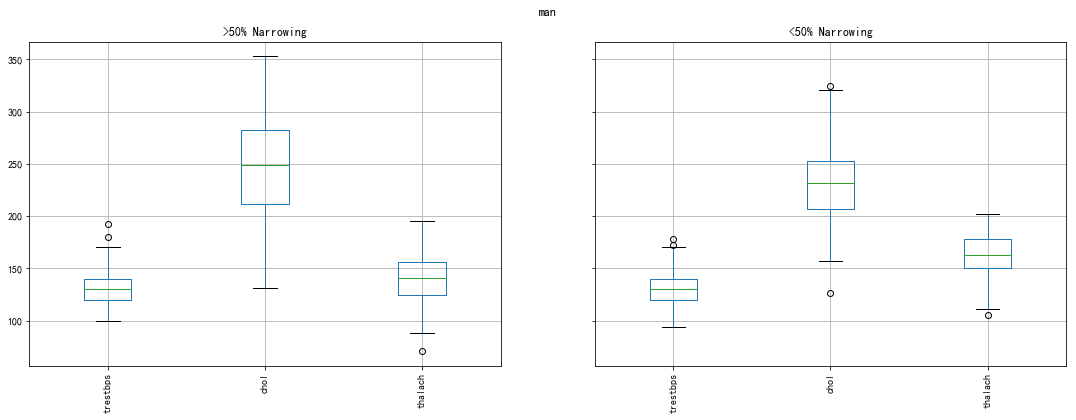

In [37]:
fig = plt.figure(figsize = (18,6))
fig.suptitle('man')
ax = fig.subplots(nrows = 1, ncols = 2, sharey = True)
heart_man.boxplot(column = ['trestbps', 'chol', 'thalach'], rot = 90, ax = ax)
ax[0].set_title('>50% Narrowing')
ax[1].set_title('<50% Narrowing')

I:\APP\Ananconda\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,1,'<50% Narrowing')

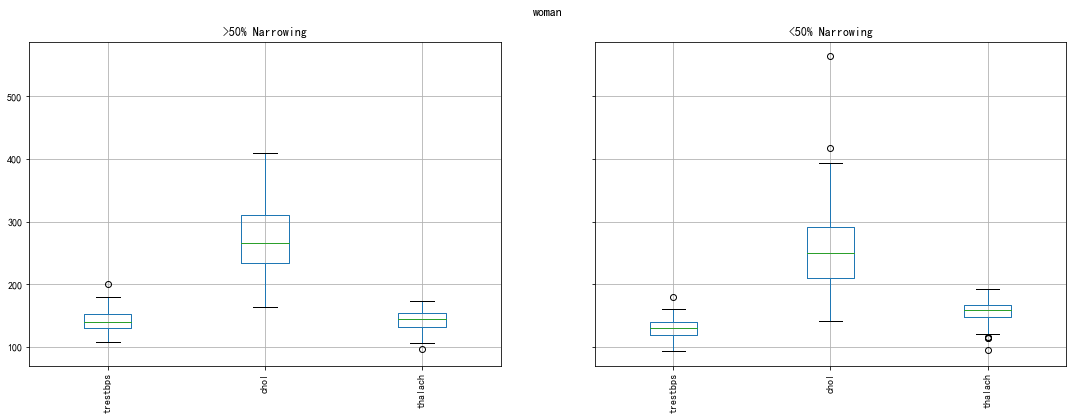

In [39]:
fig = plt.figure(figsize = (18,6))
fig.suptitle('woman')
ax = fig.subplots(nrows = 1, ncols = 2, sharey = True)
heart_woman.boxplot(column = ['trestbps', 'chol', 'thalach'], rot = 90, ax = ax)
ax[0].set_title('>50% Narrowing')
ax[1].set_title('<50% Narrowing')

I:\APP\Ananconda\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,1,'<50% Narrowing')

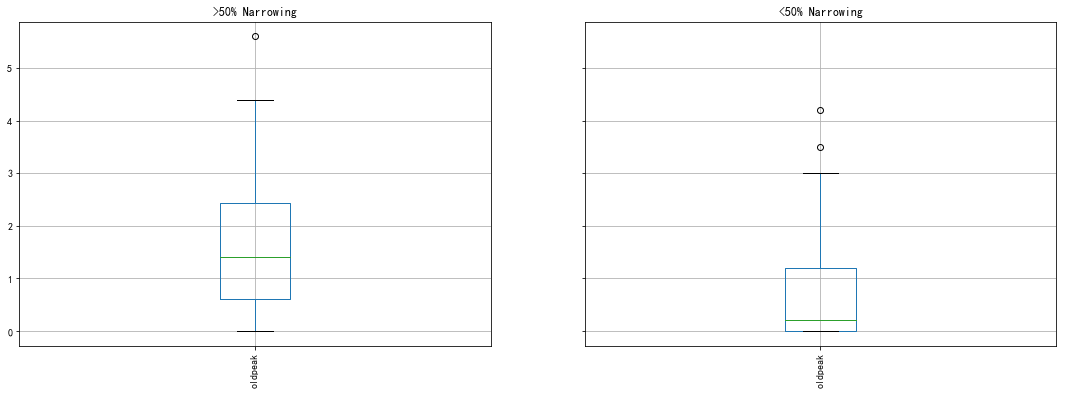

In [40]:
fig = plt.figure(figsize = (18,6))
ax = fig.subplots(nrows = 1, ncols = 2, sharey = True)
heart_man.boxplot(column = ['oldpeak'], rot = 90, ax = ax)
ax[0].set_title('>50% Narrowing')
ax[1].set_title('<50% Narrowing')

I:\APP\Ananconda\lib\site-packages\IPython\core\interactiveshell.py:2961: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5,1,'<50% Narrowing')

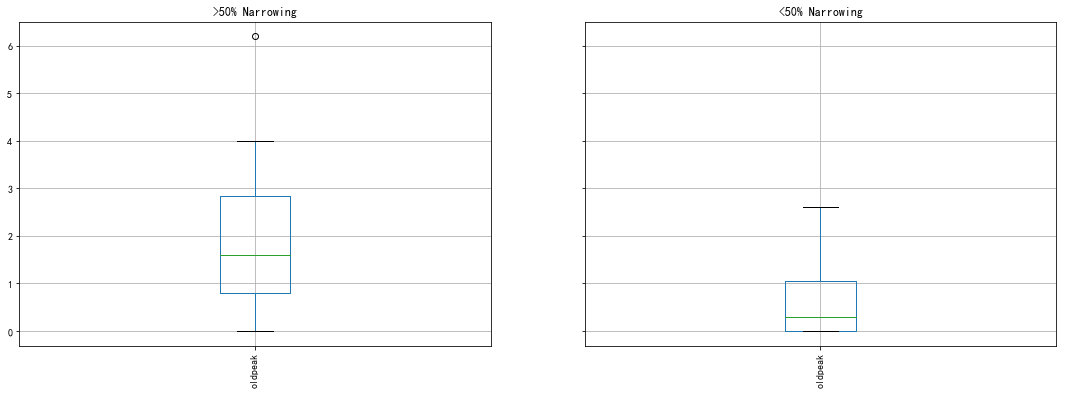

In [41]:
fig = plt.figure(figsize = (18,6))
ax = fig.subplots(nrows = 1, ncols = 2, sharey = True)
heart_woman.boxplot(column = ['oldpeak'], rot = 90, ax = ax)
ax[0].set_title('>50% Narrowing')
ax[1].set_title('<50% Narrowing')

箱线图和数据样本都说明女性的胆固醇水平高于男性。

ST降低水平在男性和女性之间相似，但在直径变窄上有很大差异。
现在让我们再次比较ST型抑郁症和胸痛的类型，这次没有过滤性别。

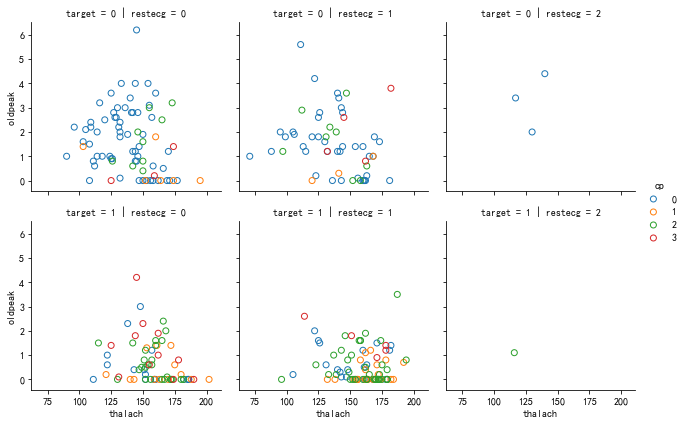

In [42]:
g5 = sns.FacetGrid(heart, col = 'restecg', row = 'target', hue = 'cp', legend_out = True, height = 3)
g5.map(plt.scatter, 'thalach', 'oldpeak', facecolors = 'none').add_legend()

plt.show()

典型的心绞痛胸痛与血脑屏障50%狭窄有很大的相关性。这很直观，因为心绞痛是由于流向心脏的血液减少而引起的疼痛。非心绞痛性胸痛与<50%的胸径狭窄和最小ST值的降低密切相关。
现在让我们找出铊压力测试(thal)的关系。铊压力测试包括将一种核示踪剂铊注入患者心脏，并通过让他们运动来对心脏施加压力。健康的心肌cll应该吸收示踪剂，然后通过核成像来检测。如果心肌在休息时吸收了示踪剂，而不是在运动时，患者将被归类为“可逆缺陷”。如果示踪剂完全没有被吸收，病人将有一个“固定的缺陷”(“心脏压力测试回顾”，n.d.)。
注意，数据与给定的数据字典不匹配。正确的解释应该是(1 =固定缺陷，2 =正常，3 =反向缺陷)

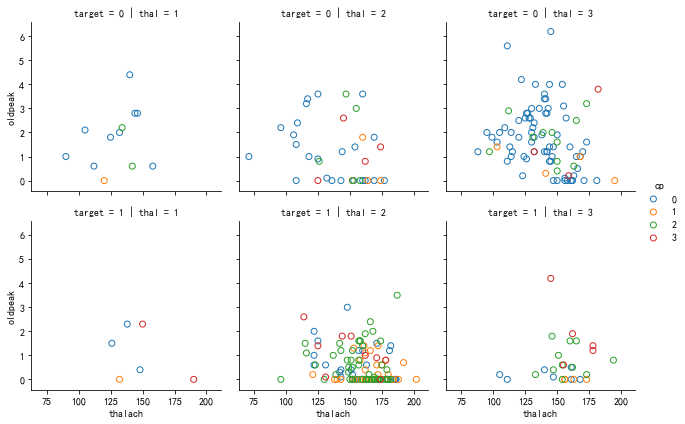

In [43]:
g6 = sns.FacetGrid(heart, col = 'thal', row = 'target', hue = 'cp', legend_out = True, height = 3)
g6.map(plt.scatter, 'thalach', 'oldpeak', facecolors = 'none').add_legend()

plt.show()

压力测试和胸痛类型都能很好地提示患者是否有50%的血脑屏障狭窄。大多数有固定缺陷的患者也有50%的胸痛和胸痛。另一方面，大多数在压力测试中结果正常的患者也有<50%的狭窄、非心绞痛性胸痛和较低的ST-depression值。

接下来，让我们评估透视结果，看看它与直径的关系。透视法包括通过核成像突出血管

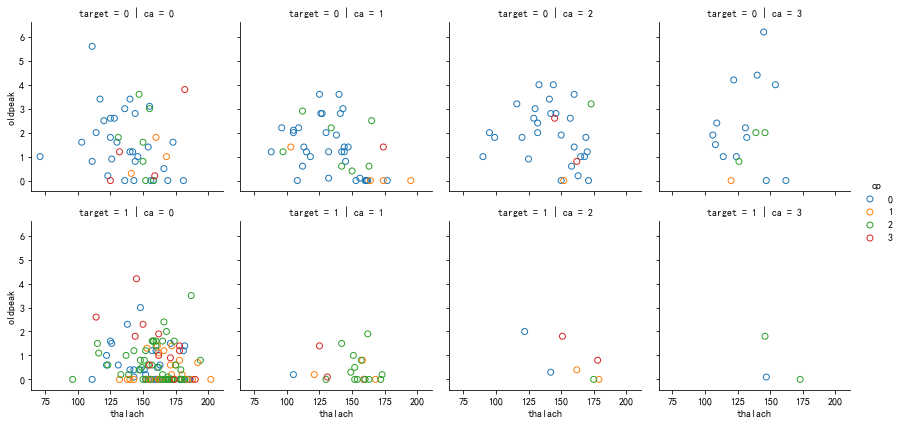

In [44]:
g6 = sns.FacetGrid(heart, col = 'ca', row = 'target', hue = 'cp', legend_out = True, height = 3)
g6.map(plt.scatter, 'thalach', 'oldpeak', facecolors = 'none').add_legend()

plt.show()

结果显示，心脏血管造影结果与血管直径变窄有轻微的相关性，有一条或多条动脉被染色的人有50%的机会出现>变窄。然而，>50%狭窄的患者有相同的机会有0、1、2或3条动脉通过透视染色。

接下来让我们来看看与运动相关的专栏，特别是运动诱发的心绞痛和斜坡。散点图将不再绘制ST洼地，因为“坡度”既具有ST洼地值，也具有高程值

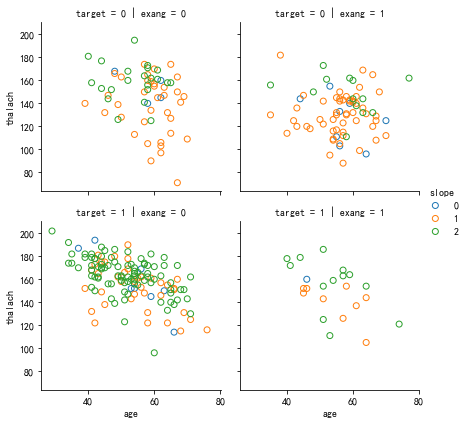

In [45]:
g7 = sns.FacetGrid(heart, col = 'exang', row = 'target', hue = 'slope', legend_out = True, height = 3)
g7.map(plt.scatter, 'age', 'thalach', facecolors = 'none').add_legend()
plt.show()

运动后，ST洼地的坡度应稍向上(提示0 =下斜，1 =平，2 =上平)，但升高1mm为异常(Hill和Timmis)。
可以看出，坡度越小，心绞痛发生率越低，而坡度越小，心绞痛发生率越低。有趣的是，在<50%和>50%窄化时，似乎都可以看到向下倾斜。然而，这可能是由于样本量有限。
在这个图中，更明显的是，<50%变窄的患者比>50%变窄的患者心率更高，特别是当他们没有运动诱发的心绞痛时。

前面，我们发现了男性和女性之间的血压差异。让我们检查一下。

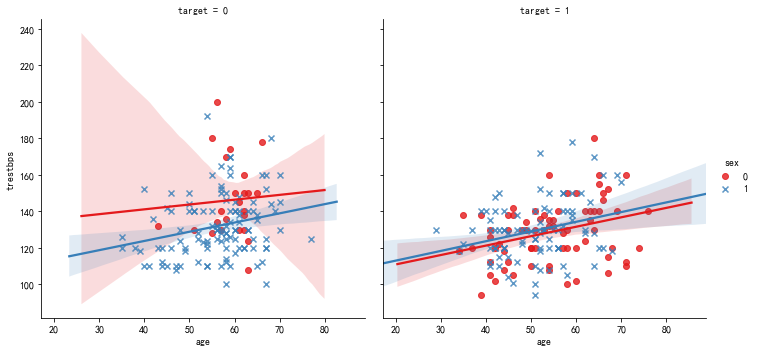

In [46]:
sns.lmplot(x = 'age', y = 'trestbps', hue = 'sex', data = heart, col = 'target', markers=["o", "x"], palette="Set1")

结果显示，随着年龄的增长，男性和女性的血压都在升高，而小于50%的男性的血压比女性略高。这与早期对健康男性和女性的血压进行比较的研究相吻合，研究表明，健康男性的血压略高于健康女性。(Wiinberg等)。

我们做个检验来进一步确认一下。

In [47]:
mean_man_bp = heart[heart['sex']==1]['trestbps'].mean()
mean_woman_bp = heart[heart['sex']==0]['trestbps'].mean()
print(mean_man_bp)
print(mean_woman_bp)

130.88059701492537
133.13684210526316


In [48]:
bp_m_f = sci.stats.ttest_ind(heart[heart['sex']==1]['trestbps'], heart[heart['sex']==0]['trestbps'])
bp_m_f

Ttest_indResult(statistic=-1.0223688482467654, pvalue=0.30744686062660237)

经检验，p值为0.31，大于0.05，故本样本男女血压差异不显著。

于那些血脑屏障缩小50%的患者，女性的静息血压似乎高于男性。但是，这受到样本量小的限制，大部分女性样本的年龄在50-70岁之间，只有一个女性样本的年龄小于50岁。

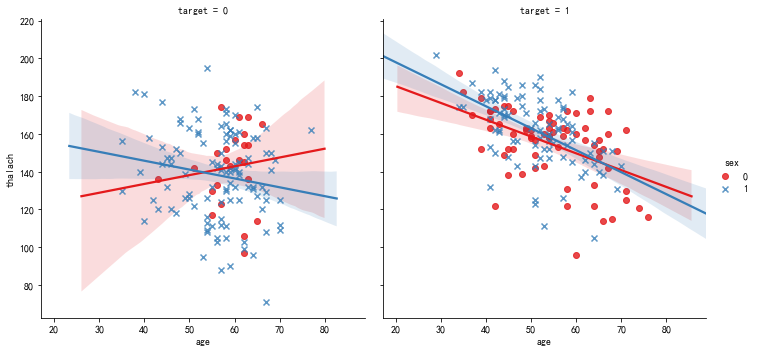

In [49]:
sns.lmplot(x = 'age', y = 'thalach', hue = 'sex', data = heart, col = 'target', markers=["o", "x"], palette="Set1")

小于50%变窄的个体心率随年龄下降。其原因仍在研究中，但部分原因是由于窦房肌细胞(SAMs)的放电降低(Larson等人)，而窦房肌细胞负责通过心脏产生动作电位来引发心跳。对于>缩小50%的个体，数据再次受到年轻女性样本有限的影响。
上面两个显示静息血压和最大心率的图在target = 0时都有相同的离群值。让我们找出这个数据点在dataframe中的位置。

In [50]:
heart.loc[(heart['sex'] == 0) & (heart['age'] < 45) & (heart['target'] == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0


在女性样本中胆固醇水平也有异常值。让我们找到这个数据点。

In [51]:
heart.loc[heart['chol'] == max(heart['chol'])]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


删除这些异常值，以防止它们影响机器学习预测

In [52]:
heart = heart.drop([85, 215])
heart.shape

(294, 14)

In [63]:
shuffled_index = np.random.permutation(heart.index)
# shuffle与permutation都是对原来的数组进行重新洗牌
train_max_row = math.floor(heart.shape[0] * .7)
# floor 向下舍入为最接近的整数

heart_dt = heart.copy()
heart_dt['sex'] = heart_dt['sex'].astype('object') # astype转换数组的数据类型。
heart_dt['cp'] = heart_dt['cp'].astype('object')
heart_dt['fbs'] = heart_dt['fbs'].astype('object')
heart_dt['restecg'] = heart_dt['restecg'].astype('object')
heart_dt['exang'] = heart_dt['exang'].astype('object')
heart_dt['slope'] = heart_dt['slope'].astype('object')
heart_dt['thal'] = heart_dt['thal'].astype('object')

In [64]:
heart_dt = pd.get_dummies(heart_dt, drop_first=True)
heart_dt.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,0,0,0,1,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,1,0,0,0,1,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,0,1,0,1,1,0


In [65]:
columns = list(heart_dt.columns)
columns.remove('target')
columns

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'ca',
 'sex_1',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_1',
 'restecg_1',
 'restecg_2',
 'exang_1',
 'slope_1',
 'slope_2',
 'thal_2',
 'thal_3']

分割训练和测试数据集

In [66]:
heart_data = heart_dt[columns]
heart_label = heart_dt['target']

In [67]:
from sklearn.model_selection import train_test_split

In [76]:
X_train,X_test,y_train,y_test = train_test_split(heart_data,heart_label,test_size=0.2)

In [73]:
print(heart_data.shape)
print(heart_label.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(294, 18)
(294,)
(235, 18)
(59, 18)
(235,)
(59,)


In [77]:
y_train.value_counts()

1    123
0    112
Name: target, dtype: int64

In [78]:
DecisionTree= DecisionTreeClassifier()  # 决策树
DecisionTree.fit(X_train,y_train).score(X_test,y_test)

0.7288135593220338

In [82]:
DecisionTree.fit(X_train,y_train).score(X_train,y_train)

1.0

这个模型显然是对训练数据的过度拟合。训练集的准确率为100%，而测试集的roc_auc_score仅为74%。我们需要试着调优一些超参数。但是，让我们首先将当前的决策树可视化

In [83]:
# Random Forest 随机森林
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor()
forest_model.fit(X_train,y_train).score(X_train,y_train)

0.8945775261324042

In [84]:
forest_model.fit(X_train,y_train).score(X_train,y_train)

0.8790541521486643

# 归一化

In [87]:
heart_deal = heart_dt.copy()
heart_deal.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_2,thal_3
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,0,0,0,1,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,1,0,0,0,1,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,0,1,0,1,1,0


In [88]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()

In [90]:
Scaler.fit(heart_deal)
a = Scaler.transform(heart_deal)
a

array([[0.70833333, 0.48113208, 0.36769759, ..., 0.        , 0.        ,
        0.        ],
       [0.16666667, 0.33962264, 0.42611684, ..., 0.        , 1.        ,
        0.        ],
       [0.25      , 0.33962264, 0.26804124, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.8125    , 0.47169811, 0.23024055, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 0.33962264, 0.01718213, ..., 0.        , 0.        ,
        1.        ],
       [0.58333333, 0.33962264, 0.37800687, ..., 0.        , 1.        ,
        0.        ]])

In [91]:
heart_deal = pd.DataFrame(a)

In [93]:
heart_deal.columns=heart_dt.columns
heart_deal.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_2,thal_3
0,0.708333,0.481132,0.367698,0.603053,0.370968,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.166667,0.339623,0.426117,0.885496,0.564516,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.268041,0.770992,0.225806,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.562500,0.245283,0.378007,0.816794,0.129032,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.583333,0.245283,0.783505,0.702290,0.096774,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [94]:
col = list(heart_dt.columns)
col.remove("target")
col

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'ca',
 'sex_1',
 'cp_1',
 'cp_2',
 'cp_3',
 'fbs_1',
 'restecg_1',
 'restecg_2',
 'exang_1',
 'slope_1',
 'slope_2',
 'thal_2',
 'thal_3']

In [95]:
X= heart_dt[col]
y = heart_dt['target']

In [96]:
X_train_,X_test_,y_train_,y_test_ = train_test_split(X,y,test_size=0.2)

In [97]:
# Random Forest 随机森林
from sklearn.ensemble import RandomForestRegressor
forest_model_deal = RandomForestRegressor()
forest_model_deal.fit(X_train_,y_train_).score(X_train_,y_train_)

0.8982434640522876

In [98]:
DecisionTree_deal= DecisionTreeClassifier()  # 决策树
DecisionTree_deal.fit(X_train_,y_train_).score(X_train_,y_train_)

1.0

In [99]:
DecisionTree_deal.fit(X_train_,y_train_).score(X_train_,y_train_)

1.0